In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

In [13]:
df_crime = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

In [14]:
df_crime_rev = df_crime[['City', 'Population', 'Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Arson3']]

In [15]:
df_crime_rev = df_crime_rev.dropna(axis=0,subset=['Property\ncrime'])

In [16]:
df_crime_rev.Population = df_crime_rev.Population.str.replace(',', '').astype(float)
df_crime_rev.Robbery = df_crime_rev.Robbery.str.replace(',', '').astype(float)
df_crime_rev['Violent\ncrime'] = df_crime_rev['Violent\ncrime'].str.replace(',', '').astype(float)
df_crime_rev['Aggravated\nassault'] = df_crime_rev['Aggravated\nassault'].str.replace(',', '').astype(float)
df_crime_rev['Burglary'] = df_crime_rev['Burglary'].str.replace(',', '').astype(float)
df_crime_rev['Larceny-\ntheft'] = df_crime_rev['Larceny-\ntheft'].str.replace(',', '').astype(float)
df_crime_rev['Property\ncrime'] = df_crime_rev['Property\ncrime'].str.replace(',', '').astype(float)

In [17]:
for column in df_crime_rev.columns[2:]:
    df_crime_rev[column + ' per cap'] = df_crime_rev[column] / df_crime_rev.Population

In [18]:
X = df_crime_rev[['Population', 'Violent\ncrime per cap', 'Robbery per cap',
       'Aggravated\nassault per cap', 'Burglary per cap']]
Y = df_crime_rev['Property\ncrime']

### OLS regression

In [23]:
OLS_model = linear_model.LinearRegression()

OLS_model.fit(X, Y)
OLS_score = OLS_model.score(X,Y)
OLS_score

0.9959418322592197

In [28]:
cross_val_score(OLS_model, X, Y, cv=5)

array([ 0.77135564,  0.67539087, -4.01919053,  0.54716003,  0.80764582])

### KNN regression

In [35]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_model.fit(X,Y)
knn_score = knn_model.score(X,Y)
knn_score

1.0

In [36]:
knn_cross_val_score = cross_val_score(knn_model, X, Y, cv=5)
knn_cross_val_score

array([ 0.6820412 ,  0.61450266,  0.56374529,  0.05960852, -0.03825622])

In [37]:
k_score = []
for k in range(1,31):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X,Y)
    k_score.append(knn.score(X,Y))

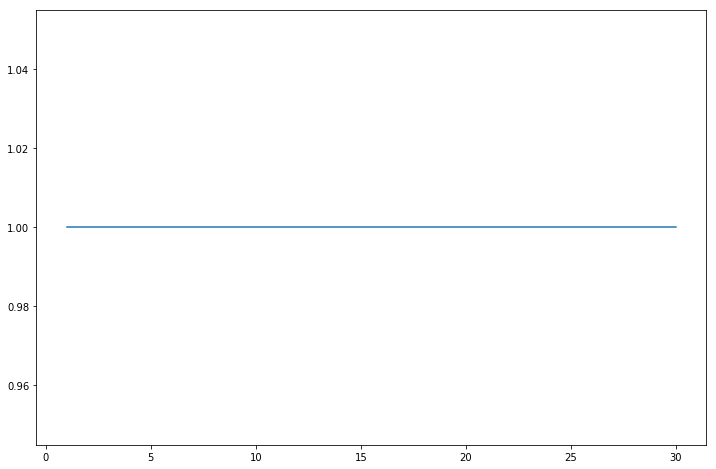

In [38]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.lineplot(x=list(range(1,31)),y=k_score)
plt.show()

### Write-up